### This is a copy of lstm.ipynb
### It is a sandbox for exploring confusion matrix variations
### In the multi-classification of behaviors





In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Conv2D, Activation
from keras.preprocessing import sequence
from sklearn import metrics
import random
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# set parameters and load data
epochs = 100
batch_size = 10
time_steps = 6
features = 300

features_path = 'input_vol.npy'
labels_path = 'input_label.npy'

X = np.load(features_path)
Y = np.load(labels_path)
print(X.shape)
print(Y.shape)

(370, 6, 300)
(370, 4)


In [3]:
# randomly shuffle data
s = np.arange(X.shape[0])
np.random.shuffle(s)
X = X[s]
Y = Y[s]

In [4]:
# split data into train and test sets
train_X = X[0:296,:,:]
test_X = X[297:369,:,:]

train_Y = Y[0:296,:]
test_Y = Y[297:369,:]

In [5]:
# model.save('interrogator_model.h5')

In [6]:
model = load_model('interrogator_model.h5')

In [7]:
# score model and log accuracya
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.44%


In [8]:
# get predictions
# each row corresponds to a behavior; each row corresponds to the classification for a given type of violence
y_pred = model.predict(test_X)
y_pred[0:5]

array([[2.5770575e-04, 1.5034443e-02, 5.3465180e-04, 9.9535853e-01],
       [9.9246502e-01, 9.9634725e-01, 9.9554634e-01, 9.9547583e-01],
       [5.7527279e-03, 8.8905487e-03, 9.9938977e-01, 5.4551190e-04],
       [1.1532002e-02, 9.9623740e-01, 9.9831533e-01, 1.8469698e-03],
       [9.7009605e-01, 9.9189609e-01, 1.5586735e-02, 9.9841166e-01]],
      dtype=float32)

In [9]:
# create list of classes for input to confusion matrix
# need to compe back and automate this.
all_permutations = [[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]]
classes = []
for label in all_permutations:
    val = ""
    for x in label:
        val = val + str(int(x))
    classes.append(val)
    
classes

['0000',
 '1000',
 '0100',
 '0010',
 '0001',
 '1100',
 '1010',
 '1001',
 '0110',
 '0101',
 '0011',
 '1110',
 '1101',
 '1011',
 '0111',
 '1111']

In [10]:
len(classes)

16

In [11]:
# create y true and y predictions to input into confusion matrix
# values must be strings or ints for scikit-learn's confusion matrix, so we must transform them

yt = []
for label in test_Y:
    val = ""
    for x in label:
        val = val + str(int(x))
    yt.append(val)
    
yp = []
for label in y_pred:
    val = ""
    for x in label:
        
        val = val + str(int(0 if x < 0.8 else 1))
    yp.append(val)

print(yp)

['0001', '1111', '0010', '0110', '1101', '1000', '0000', '0011', '1100', '1000', '0111', '0000', '0001', '0000', '0000', '0100', '0000', '0110', '0001', '0000', '0000', '0010', '0000', '0000', '0101', '0000', '0001', '0000', '0000', '0000', '0001', '1000', '0011', '1011', '0110', '1010', '0000', '0010', '1101', '0010', '0011', '1110', '1010', '0011', '0111', '0000', '0000', '0110', '0000', '1111', '1000', '1000', '0000', '0000', '0000', '0010', '0001', '0001', '0100', '1010', '0110', '0000', '1000', '0110', '0100', '0000', '0000', '0000', '0000', '0000', '1000', '0000']


In [12]:
#Ben Note: The confusion matrix is not generating a full sized matrix; it should be
#fixed by adding an argument

confusion = metrics.confusion_matrix(yt, yp, labels = classes)
confusion

array([[24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [13]:
yp[0]

'0001'

In [16]:
y_pred[0]

array([2.5770575e-04, 1.5034443e-02, 5.3465180e-04, 9.9535853e-01],
      dtype=float32)

In [17]:
###------Need to create a function that lets you pick one of these pairings
###------and then it returns to you the corresponding entries

In [18]:
V1 = 'V1'
V2 = 'V2'
V3 = 'V3'
V4 = 'V4'
Violence_Cols = [V1, V2, V3, V4]

test_Y_df = pd.DataFrame(test_Y)

test_Y_df.columns = Violence_Cols
test_Y_df = test_Y_df[Violence_Cols].astype('int')
test_Y_df.head()

,V1,V2,V3,V4
0,0,0,0,1
1,1,1,1,1
2,0,0,1,0
3,0,1,1,0
4,1,1,0,1


In [19]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.apply(lambda x: np.rint(x))

y_pred_df.columns = Violence_Cols

y_pred_df = y_pred_df[Violence_Cols].astype('int')

y_pred_df.head()

,V1,V2,V3,V4
0,0,0,0,1
1,1,1,1,1
2,0,0,1,0
3,0,1,1,0
4,1,1,0,1


In [20]:
"""hand_note_1 = '0010'
hand_note_2 = '0001'
df = test_Y_df

categories_string = hand_note_1

char_num = 0
compound_conditional = True

for each_char in categories_string:
    char_cond = (df.iloc[:,char_num] == int(each_char))
    compound_conditional = compound_conditional & char_cond
    char_num += 1

#This becomes a mask:
compound_conditional

df[compound_conditional].head()"""

"hand_note_1 = '0010'\nhand_note_2 = '0001'\ndf = test_Y_df\n\ncategories_string = hand_note_1\n\nchar_num = 0\ncompound_conditional = True\n\nfor each_char in categories_string:\n    char_cond = (df.iloc[:,char_num] == int(each_char))\n    compound_conditional = compound_conditional & char_cond\n    char_num += 1\n\n#This becomes a mask:\ncompound_conditional\n\ndf[compound_conditional].head()"

In [21]:
def get_row_mask_by_labelset(label_set, df):
    """Input: a full label set for a single row, and
    the dataframe to match against.
    Returns: a boolean mask for the data frame that 
    can be used to filter out those rows.
    """
    categories_string = label_set
    char_num = 0
    
    compound_conditional = True

    # use for loop to chain AND for each character
    for each_char in categories_string:
        loop_cond = (df.iloc[:,char_num] == int(each_char))
        compound_conditional = compound_conditional & loop_cond
        char_num += 1
    
    return compound_conditional

In [22]:
get_row_mask_by_labelset('0010', test_Y_df)[0:10] #these numbers can change as the data is shuffled

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
9    False
dtype: bool

In [23]:
def get_rows_masked_by_labelset(label_set,df):
    """Returns the rows where the label set matches the labels in the data frame.
    """
    return df[get_row_mask_by_labelset(label_set,df)]

In [24]:
get_rows_masked_by_labelset('0010',test_Y_df)

,V1,V2,V3,V4
2,0,0,1,0
5,0,0,1,0
11,0,0,1,0
21,0,0,1,0
31,0,0,1,0
37,0,0,1,0
39,0,0,1,0
55,0,0,1,0


In [25]:
get_rows_masked_by_labelset('0010',y_p_df)

NameError: name 'y_p_df' is not defined

In [26]:
# Use Lauren's filter on the dataframe
# nb - the 0.8 was arbitrary choice, and can be changed.
y_p_df = y_pred_df.applymap(lambda x: 0 if x < 0.8 else 1)

In [27]:
y_p_df.head()

,V1,V2,V3,V4
0,0,0,0,1
1,1,1,1,1
2,0,0,1,0
3,0,1,1,0
4,1,1,0,1


In [28]:
y_p_df[get_row_mask_by_labelset('1000', test_Y_df) & get_row_mask_by_labelset('0010', y_p_df)]

,V1,V2,V3,V4


In [29]:
def get_row_mask_for_2dfs_and_2labels(label_set1,df1,label_set2,df2):
    mask = get_row_mask_by_labelset(label_set1, df1) & get_row_mask_by_labelset(label_set2, df2)
    return mask

In [30]:
test_Y_df[get_row_mask_for_2dfs_and_2labels('0100',test_Y_df,'0000',y_p_df)][0:10]

,V1,V2,V3,V4
22,0,1,0,0


In [31]:
y_p_df.head()

,V1,V2,V3,V4
0,0,0,0,1
1,1,1,1,1
2,0,0,1,0
3,0,1,1,0
4,1,1,0,1


In [32]:
# plot confusion matrix with class labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[24  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  4  0  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]


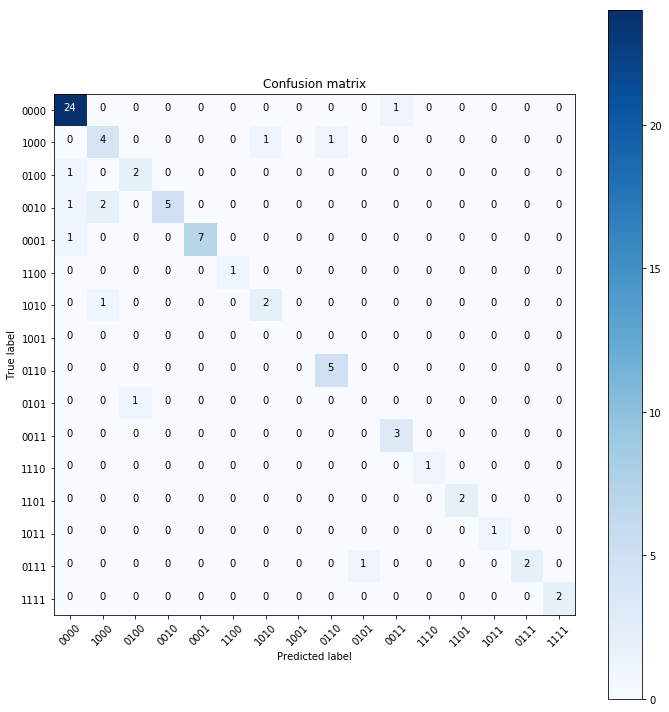

In [33]:
# compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion, classes=classes, title='Confusion matrix')

plt.show()

In [34]:
# The hand-input numbers may change if the data is reshuffled
pd.concat([test_Y_df[get_row_mask_for_2dfs_and_2labels('0110',test_Y_df,'1101',y_p_df)],
           y_p_df[get_row_mask_for_2dfs_and_2labels('0001',test_Y_df,'1010',y_p_df)]],axis=1)

,V1,V2,V3,V4,V1,V2,V3,V4


In [35]:
get_rows_masked_by_labelset('1111',test_Y_df)

,V1,V2,V3,V4
1,1,1,1,1
49,1,1,1,1


In [36]:
get_rows_masked_by_labelset('1111',y_p_df)

,V1,V2,V3,V4
1,1,1,1,1
49,1,1,1,1


In [37]:
def get_concat_classifiers(test_label_set, test_df, pred_label_set, pred_label_df):
    """Uses masks to expose the rows where the test data frame has the first set of labels
    and the predicted data frame has the second set of labels. 
    Outputs the contatenation of the two.
    
    """
    
    tdf = test_df
    pdf = pred_label_df
    
    tlbl = test_label_set
    plbl = pred_label_set
    
    mask = get_row_mask_for_2dfs_and_2labels(tlbl, tdf, plbl, pdf)
       
    return pd.concat([tdf[mask],pdf[mask]], axis=1)

In [38]:
# The hand-input numbers may change if the data is reshuffled
get_concat_classifiers('1110',test_Y_df,'0000',y_p_df)

,V1,V2,V3,V4,V1,V2,V3,V4


In [39]:
test_Y_df[Violence_Cols[0]].sum()
#There are 29 positives, but if the data is reshuffled this will change.


# The labels below should be [0, 1] or [No, Yes]

16

In [40]:
test_Y_df[Violence_Cols[0]]
y_p_df.sum()

V1    18
V2    19
V3    24
V4    19
dtype: int64

Confusion matrix, without normalization
[[54  2]
 [ 0 16]]


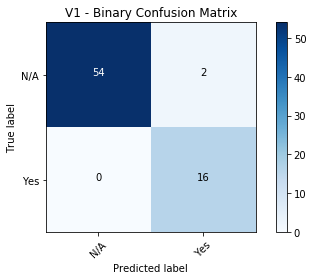

Confusion matrix, without normalization
[[52  2]
 [ 1 17]]


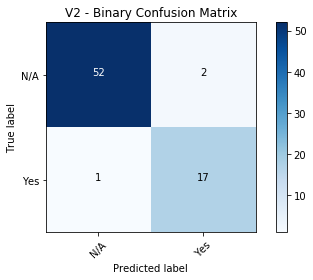

Confusion matrix, without normalization
[[43  3]
 [ 5 21]]


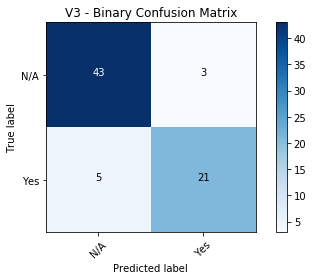

Confusion matrix, without normalization
[[51  1]
 [ 2 18]]


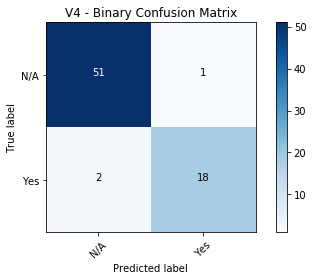

In [41]:
for each_cat in Violence_Cols:
    conf_mat = metrics.confusion_matrix(test_Y_df[each_cat],y_p_df[each_cat])
    plot_confusion_matrix(conf_mat, ['N/A', 'Yes'], title = (str(each_cat) + " - Binary Confusion Matrix" ))
    plt.show()

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [64]:
index = 0

for each_cat in Violence_Cols:
    
    ac = accuracy_score(test_Y_df[each_cat],y_p_df[each_cat])
    pr = precision_score(test_Y_df[each_cat],y_p_df[each_cat])
    rc = recall_score(test_Y_df[each_cat],y_p_df[each_cat])
    f1 = f1_score(test_Y_df[each_cat],y_p_df[each_cat])
    
    print(str(each_cat) + " | Acc: %.2f" % ac + " | Prec: %.2f" % pr + \
          " | Rec: %.2f" % rc + " | f1: %.2f" % f1)
    
    index = index + 1

V1 | Acc: 0.97 | Prec: 0.89 | Rec: 1.00 | f1: 0.94
V2 | Acc: 0.96 | Prec: 0.89 | Rec: 0.94 | f1: 0.92
V3 | Acc: 0.89 | Prec: 0.88 | Rec: 0.81 | f1: 0.84
V4 | Acc: 0.96 | Prec: 0.95 | Rec: 0.90 | f1: 0.92


In [65]:
ypd = y_p_df
ytd = test_Y_df

In [66]:
#Number of incorect predictions per violence type
#Math rationale: y's are 0 or 1, so the difference is either +1, 0 or -1; square it to make +1 and 0, then sum
column_sum_incorrect = ((ypd - ytd)**2).sum(axis=0)

In [67]:
column_sum_incorrect.head()

V1    2
V2    3
V3    8
V4    3
dtype: int64

In [68]:
#Number of incorrect predictions for an individual behavior entry
row_sum_inccorect = ((ypd - ytd)**2).sum(axis=1)

In [69]:
row_sum_inccorect.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [70]:
row_sum_inccorect.max()

2

In [71]:
ypd.loc[row_sum_inccorect == 4]

,V1,V2,V3,V4


In [72]:
ypd.loc[row_sum_inccorect == 3]

,V1,V2,V3,V4


In [73]:
ypd.loc[row_sum_inccorect == 2]

,V1,V2,V3,V4
5,1,0,0,0
7,0,0,1,1
31,1,0,0,0
34,1,1,1,0


In [74]:
ypd.loc[row_sum_inccorect == 1]

,V1,V2,V3,V4
9,1,0,0,0
11,0,0,0,0
12,0,1,0,1
22,0,0,0,0
24,0,1,0,1
35,1,0,1,0
48,0,0,0,0
64,0,1,0,0


In [75]:
# Need to find what is classified well/not well
print(ytd.iloc[1])
print(ypd.iloc[1])

V1    1
V2    1
V3    1
V4    1
Name: 1, dtype: int64
V1    1
V2    1
V3    1
V4    1
Name: 1, dtype: int64


In [76]:
collect_scores = pd.DataFrame()
row_scores_columns = ['Num_Incorrect', 'X-Accuracy', 'X-Precision', 'X-Recall']

for each_row_idx in ytd.index:
    #print(each_row_idx)
    
    incorrect = ((ypd - ytd)**2).sum(axis=1)
    
    Xac = accuracy_score(ytd.iloc[each_row_idx], ypd.iloc[each_row_idx])
    Xpr = precision_score(ytd.iloc[each_row_idx], ypd.iloc[each_row_idx])
    Xre = recall_score(ytd.iloc[each_row_idx], ypd.iloc[each_row_idx])
    
    collect_scores[each_row_idx] = [incorrect[each_row_idx].astype('int'), Xac, Xpr, Xre]
    
collect_scores = collect_scores.T
collect_scores.columns = row_scores_columns
collect_scores.head()

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0


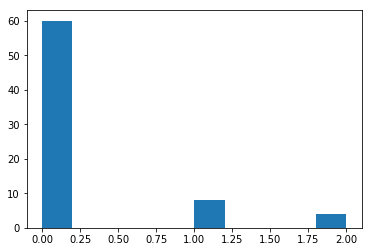

In [77]:
#scaling int he plot is a bit strang
plt.hist(collect_scores['Num_Incorrect'])
plt.show()

In [78]:
collect_scores.head()

,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0
4,0.0,1.0,1.0,1.0


In [79]:
combined = pd.concat([ytd,ypd,collect_scores],axis=1)

In [80]:
combined.head()

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0,0,0,1,0,0,0,1,0.0,1.0,1.0,1.0
1,1,1,1,1,1,1,1,1,0.0,1.0,1.0,1.0
2,0,0,1,0,0,0,1,0,0.0,1.0,1.0,1.0
3,0,1,1,0,0,1,1,0,0.0,1.0,1.0,1.0
4,1,1,0,1,1,1,0,1,0.0,1.0,1.0,1.0


In [81]:
combined.loc[combined["Num_Incorrect"]==4]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall


In [82]:
combined.loc[combined["Num_Incorrect"]==3]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall


In [83]:
combined.loc[combined["Num_Incorrect"]==2]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
5,0,0,1,0,1,0,0,0,2.0,0.5,0.000000,0.0
7,0,0,0,0,0,0,1,1,2.0,0.5,0.000000,0.0
31,0,0,1,0,1,0,0,0,2.0,0.5,0.000000,0.0
34,1,0,0,0,1,1,1,0,2.0,0.5,0.333333,1.0


In [84]:
combined.loc[combined["Num_Incorrect"]==1]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
9,1,0,1,0,1,0,0,0,1.0,0.75,1.0,0.500000
11,0,0,1,0,0,0,0,0,1.0,0.75,0.0,0.000000
12,0,0,0,1,0,1,0,1,1.0,0.75,0.5,1.000000
22,0,1,0,0,0,0,0,0,1.0,0.75,0.0,0.000000
24,0,1,1,1,0,1,0,1,1.0,0.75,1.0,0.666667
35,1,0,0,0,1,0,1,0,1.0,0.75,0.5,1.000000
48,0,0,0,1,0,0,0,0,1.0,0.75,0.0,0.000000
64,0,1,0,1,0,1,0,0,1.0,0.75,1.0,0.500000


In [85]:
combined.loc[combined["Num_Incorrect"]==0]

,V1,V2,V3,V4,V1,V2,V3,V4,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0,0,0,1,0,0,0,1,0.0,1.0,1.0,1.0
1,1,1,1,1,1,1,1,1,0.0,1.0,1.0,1.0
2,0,0,1,0,0,0,1,0,0.0,1.0,1.0,1.0
3,0,1,1,0,0,1,1,0,0.0,1.0,1.0,1.0
4,1,1,0,1,1,1,0,1,0.0,1.0,1.0,1.0
6,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
8,1,1,0,0,1,1,0,0,0.0,1.0,1.0,1.0
10,0,1,1,1,0,1,1,1,0.0,1.0,1.0,1.0
13,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
14,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
